In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data2 = pd.read_csv('ex1data2.txt', names=['Size', 'Bedrooms', 'Price'])
XX = data2.iloc[:, :(data2.shape[1]-1)]
yy = data2.iloc[:, (data2.shape[1]-1)]

In [3]:
print('Первые 10 строк из датасета: ')
for i in range(10):
     print(f' x = [{XX.iloc[i, 0]} {XX.iloc[i, 1]}], y = {yy.iloc[i]} ')

Первые 10 строк из датасета: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 


In [4]:
# Загрузим датасет заново с помощью Numpy
data = np.loadtxt('ex1data2.txt', delimiter=',')
x, y = data[:,:2], data[:,2]

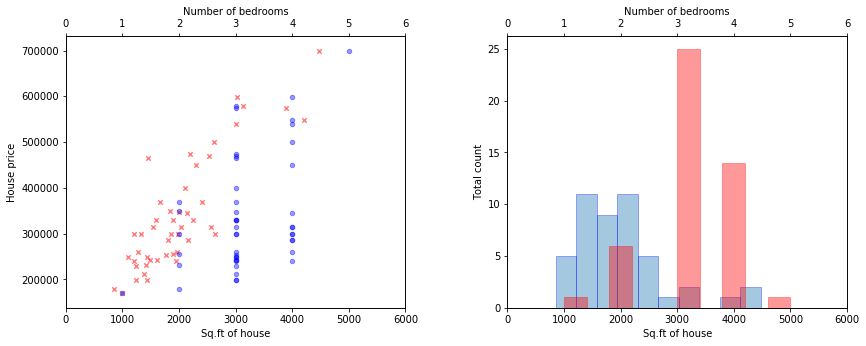

In [5]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Scatter plots:
ax1.scatter(x[:,0], y, marker='x', c='r', alpha=0.5, s=20)
ax1.set_xlabel('Sq.ft of house')
ax1.set_ylabel('House price')
ax1.set_xlim(0, 6000)

ax3 = ax1.twiny()
ax3.scatter(x[:,1], y, marker='o', c='b', alpha=0.4, s=20)
ax3.set_xlabel('Number of bedrooms')
ax3.set_xlim(0, 6)

# Histograms:
ax2.hist(x[:,0], alpha=0.4, edgecolor='b', linewidth=0.8)
ax2.set_xlabel('Sq.ft of house')
ax2.set_ylabel('Total count')
ax2.set_xlim(0, 6000)

ax4 = ax2.twiny()
ax4.hist(x[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8)
ax4.set_xlabel('Number of bedrooms')
ax4.set_xlim(0, 6);

In [6]:
def featureNormalize(X):    
    # среднее и стандартное отклонение:
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [7]:
X, mean, sigma = featureNormalize(x)
X[:5]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517]])

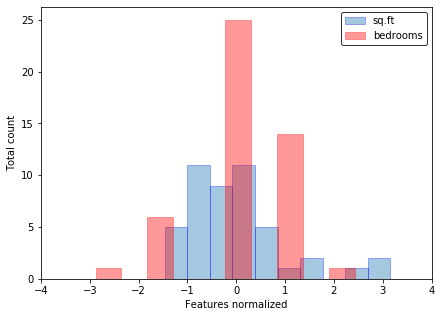

In [8]:
fig = plt.figure(figsize=(7, 5))

# Histograms:
plt.hist(X[:,0], alpha=0.4, edgecolor='b', linewidth=0.8, label='sq.ft')
plt.hist(X[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8, label='bedrooms')
plt.xlabel('Features normalized')
plt.ylabel('Total count')
plt.xlim(-4, 4)
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

# Gradient Descent

In [9]:
X = np.hstack((np.ones((X.shape[0],1)), X))
X[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [10]:
# Gradient descent algorithm
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    cost = np.zeros(iterations)
    thetaMod = theta.copy()
    thetaHist = np.zeros(iterations)
    
    for i in range(iterations):
        thetaMod = thetaMod - np.dot(X.T, (np.dot(X, thetaMod) - y)) * alpha / m
        thetaHist[i] = thetaMod[1]        
        cost[i] = computeCost(X, y, thetaMod)
        
    return thetaMod, thetaHist, cost

In [11]:
def computeCost(X, y, theta):
    m = len(y)
    return np.dot((np.dot(X, theta) - y), (np.dot(X, theta) - y)) / (2 * m)

In [12]:
iterations = 1500
alpha = 0.01
# adding theta
theta = np.zeros(3)

# calculating gradient descent
gradient, thetaHist, cost = gradientDescent(X, y, theta, alpha, iterations)  
gradient

array([340412.56301439, 109370.05670466,  -6500.61509507])

# Selecting learning rates

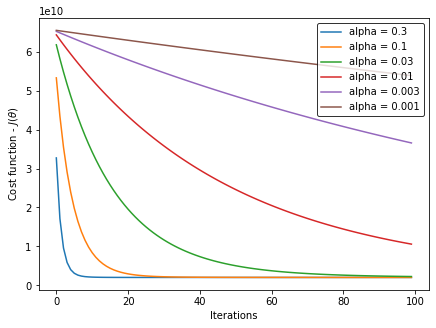

In [13]:
learningRates = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

fig, ax = plt.subplots(figsize=(7, 5))

for alpha in learningRates:
    gradientNew, thetaHistNew, costNew = gradientDescent(X, y, theta, alpha, 100) 
    
    ax.plot(costNew, label='alpha = {0}'.format(alpha))

ax.set_ylabel(r"Cost function - $J(\theta)$")
ax.set_xlabel('Iterations')
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

# Итоговый ответ для задачи

In [14]:
# running the gradient descent algorithm with best learning rate:
gradient, thetaHist, cost = gradientDescent(X, y, theta, 0.03, 500)  

# normalizing the parameters:
paramsNorm = (np.array([1650, 3]) - mean) / sigma

# adding first column of ones
params = np.hstack((np.array([1]), paramsNorm))

# predicting a house price
predict = np.dot(gradient, params)
print ('A 3 bedroom / 1650 sqft house will cost $%0.2f' % predict)

A 3 bedroom / 1650 sqft house will cost $293097.99
